In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
data = pd.read_csv('cfb_nfl_13.csv')

data = data.drop(["player"], axis=1)
x = data['avgcfb']
y = data['avgfp']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#Correlation
print(data.corr(method='pearson')) # Pearson's r - look at last row

           avgfp    avgcfb
avgfp   1.000000  0.583137
avgcfb  0.583137  1.000000


In [ ]:
# Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
x = x.values.reshape(-1, 1)
regressor.fit(x, y)

RandomForestRegressor()

        Actual   Predicted
0   210.000000  172.128400
1   204.060000  136.346400
2   184.720000  175.830600
3   183.880000  145.983000
4   166.340000  169.213800
5   130.300000  106.459750
6   129.040000  145.102300
7   117.700000  137.054400
8   114.425000  102.972750
9   111.100000  118.326600
10  108.566667   88.269700
11  107.360000   96.430467
12  102.400000   85.157800
13  101.800000   74.174800
14   99.066667   70.744667
15   96.366667   66.730083
16   95.980000   62.259000
17   89.300000   68.272667
18   83.050000   58.828500
19   76.500000   72.926667
20   71.280000   71.490700
21   66.850000   71.325000
22   55.775000   50.108817
23   54.833333   46.082417
24   50.500000   45.705000
25   44.750000   87.628133
26   41.933333   34.938500
27   41.775000   76.361250
28   34.275000   36.518467
29   29.800000   41.456400
30   24.166667   62.590133
31   22.520000   31.111167
32   20.175000   25.599083
33   19.800000   24.138750
34   19.300000   25.432500
35   13.833333   37.284850
3

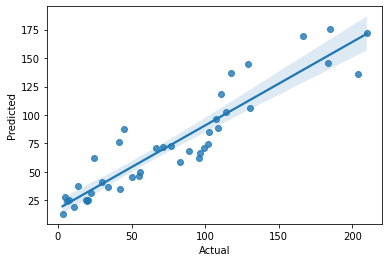

In [ ]:
# Prediction
import seaborn as sns
y_pred = regressor.predict(x)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
plt = sns.regplot(x=y, y=y_pred, data=data)
plt.set_xlabel("Actual", fontsize = 10)
plt.set_ylabel("Predicted", fontsize = 10)
print(df)

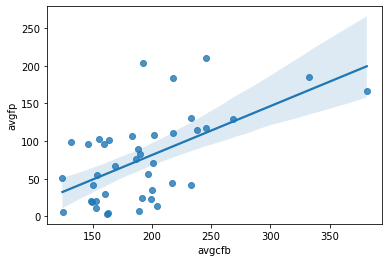

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('cfb_nfl_13.csv')
sns.regplot(x='avgcfb', y='avgfp', data=data)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('cfb_nfl_13.csv')

data = data.drop(["player"], axis=1)
data.drop(data[data["season"] != 2014].index, inplace = True)
data = data.drop(["season"], axis=1)
x = data['avgcfb']
y = data['post rank']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(data.corr(method='pearson')) # Pearson's r - look at last row

               avgfp    avgcfb      pick  draft rank  post rank
avgfp       1.000000  0.603041 -0.675058   -0.732115  -0.980812
avgcfb      0.603041  1.000000 -0.511564   -0.547329  -0.604637
pick       -0.675058 -0.511564  1.000000    0.981029   0.695512
draft rank -0.732115 -0.547329  0.981029    1.000000   0.761739
post rank  -0.980812 -0.604637  0.695512    0.761739   1.000000


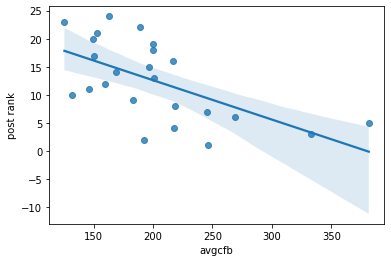

In [19]:
# Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
#x = x.values.reshape(-1, 1)
regressor.fit(x, y)
sns.regplot(x='avgcfb', y='post rank', data=data)